## Import Statements

In [4]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator

In [3]:
# Define a circuit with 1 input qubit
circuit = QuantumCircuit(1)

# Add gates to act on qubit at index 0
circuit.h(0)
circuit.s(0)
circuit.h(0)
circuit.t(0)
circuit.draw()

┌───┐┌───┐┌───┐┌───┐
q: ┤ H ├┤ S ├┤ H ├┤ T ├
   └───┘└───┘└───┘└───┘

In [5]:
# To change the name of the input qubit use QuantumRegister class
X = QuantumRegister(1, "x")
circuit = QuantumCircuit(X)
circuit.h(X)
circuit.s(X)
circuit.h(X)
circuit.t(X)
circuit.draw()

┌───┐┌───┐┌───┐┌───┐
x: ┤ H ├┤ S ├┤ H ├┤ T ├
   └───┘└───┘└───┘└───┘

In [2]:
# Defining quantum registers
X = QuantumRegister(1, "x")
Y = QuantumRegister(1, "y")

# Using ClassicalRegister to define classical bit wires
A = ClassicalRegister(1, "a")
B = ClassicalRegister(1, "b")

# Creating circuit and adding H and CNOT gates
circuit = QuantumCircuit(Y, X, B, A)
circuit.h(Y)
circuit.cx(Y, X)

# Add measurement gates
circuit.measure(Y, B)
circuit.measure(X, A)
circuit.draw()

┌───┐     ┌─┐   
  y: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
  x: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
b: 1/═══════════╩══╬═
                0  ║ 
a: 1/══════════════╩═
                   0

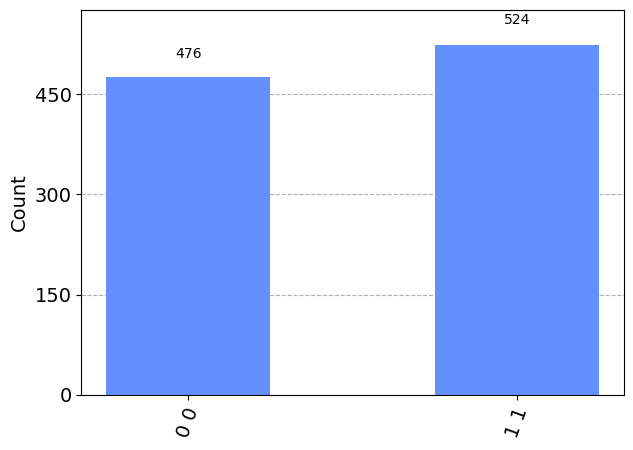

In [5]:
# Run simulation of circuit above 1000 times
simulator = AerSimulator()
circuit_simulator = simulator.run(transpile(circuit,simulator), shots=1000)
statistics = circuit_simulator.result().get_counts()
plot_histogram(statistics)